# Is Nuclear Energy a Viable Green Energy option for California?

## CIV 190 : Data and Equity for Environmental Engineering
## Final Project Group 2 - Fall 2022

**Group Members**

- Alexandre Georges
- Emily Kraemer
- Sumukhi Prasad
- Story Sandy

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt

from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

## 1. Data Acquisition and Cleaning

In [2]:
# data tables paths

file1 = 'data/table_1_9A_all.csv'
file2 = 'data/table_1_9B_all.csv'
net_generation_file = 'data/Net_generation_for_all_sectors.csv'

In [3]:
# Dataframe imports from data tables

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [4]:
# Cleaning Dataframes

def clean_df(df):
    df = df.rename(columns={
        "Census Division\nand State": 'State/Region',
        'August 2022': 'Aug 22',
        'August 2021': 'Aug 21',
        'Percentage\nChange': 'Percent Change'
    })
    df = df.sort_values(by='State/Region')
    df = df.replace('--', 0)
    df = df.astype({'Aug 22': int,
                    'Aug 21': int})
    df['Percent Change'] = ((df['Aug 21'] - df['Aug 22'])/df['Aug 22'])*100
    df = df.fillna(0)
    return df

df1 = clean_df(df1)
df1

,State/Region,Aug 22,Aug 21,Percent Change
36,Alabama,3914,4066,3.883495
59,Alaska,0,0,0.000000
46,Arizona,2930,2933,0.102389
41,Arkansas,1360,1337,-1.691176
55,California,1679,1681,0.119119
...,...,...,...,...
17,West North Central,3522,3359,-4.628052
40,West South Central,6627,6515,-1.690056
34,West Virginia,0,0,0.000000
16,Wisconsin,881,823,-6.583428


## 2. EDA

In [5]:
to_drop =  ['East North Central', 'East South Central', 'Middle Atlantic', 'Pacific Contiguous', 'Pacific Noncontiguous', 'South Atlantic', 'U.S. Total', 'West North Central', 'New England', 'Mountain', 'West North Central', 'West South Central']
df1_states = df1[~df1['State/Region'].isin(to_drop)]
df1_states['State Codes'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
df1_states.head()

C:\Users\erich\AppData\Local\Temp\ipykernel_1888\3529036016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_states['State Codes'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']


,State/Region,Aug 22,Aug 21,Percent Change,State Codes
36,Alabama,3914,4066,3.883495,AL
59,Alaska,0,0,0.000000,AK
46,Arizona,2930,2933,0.102389,AZ
41,Arkansas,1360,1337,-1.691176,AR
55,California,1679,1681,0.119119,CA


In [6]:
# create figure
fig = px.choropleth(df1_states, locationmode="USA-states", locations='State Codes', color='Percent Change', scope="usa", color_discrete_sequence=px.colors.sequential.Agsunset)
 
fig.show()

## Current Energy Mix

In [24]:
# Importing Net generation data

netgen_df = pd.read_csv(net_generation_file)
# Cleaning unneeded rows and columns
netgen_df = netgen_df.drop(index=[0,1,2,3,4,5,6])
a = np.array(['Net Generation Sources', 'Units', 'Source Key'])
b = np.arange(2001, 2022)
columns = np.append(a, b)
netgen_df.columns = columns
netgen_df = netgen_df.reset_index()
netgen_df = netgen_df.drop(columns=['index', 'Units'])
netgen_df = netgen_df.fillna(0)

netgen_df['Net Generation Sources'] = netgen_df['Net Generation Sources'].str.replace(r'United States : ', '', regex=True)

netgen_df.head()

,Net Generation Sources,Source Key,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,coal,ELEC.GEN.COW-US-99.A,1903956,1933130,1973737,1978301,2012873,1990511,2016456,1985801,...,1514043,1581115,1581710.0,1352398.0,1239149.0,1205835.0,1149487.0,964957.0,773393.0,897885.0
1,petroleum liquids,ELEC.GEN.PEL-US-99.A,114647,78701,102734,100391,99840,44460,49505,31917,...,13403,13820,18276.0,17372.0,13008.0,12414.0,16245.0,11522.0,9662.0,11665.0
2,petroleum coke,ELEC.GEN.PC-US-99.A,10233,15867,16672,20754,22385,19706,16234,14325,...,9787,13344,11955.0,10877.0,11197.0,8976.0,8981.0,6819.0,7679.0,7511.0
3,natural gas,ELEC.GEN.NG-US-99.A,639129,691006,649908,710100,760960,816441,896590,882981,...,1225894,1124836,1126635.0,1334668.0,1379271.0,1297703.0,1471843.0,1588533.0,1626790.0,1579361.0
4,other gases,ELEC.GEN.OOG-US-99.A,9039,11463,15600,15252,13464,14177,13453,11707,...,11898,12853,12022.0,13117.0,12807.0,12469.0,13463.0,12591.0,11818.0,11397.0


In [26]:
# Dropping other renewables because its always zero
netgen_df = netgen_df[~(netgen_df['Net Generation Sources'] == 'other renewables')]

In [27]:
# Without hydro storage

no_storage = netgen_df[~(netgen_df['Net Generation Sources'] == 'hydro-electric pumped storage')]

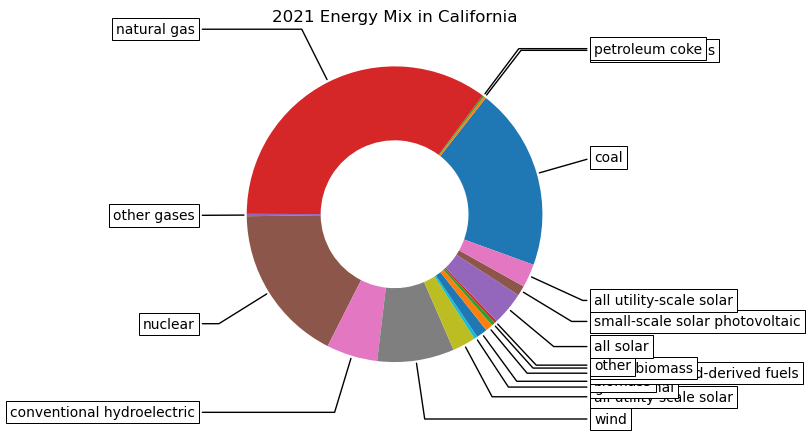

In [57]:
fig, ax = plt.subplots()

wedges, pie = ax.pie(no_storage['2021'], wedgeprops=dict(width=0.5), startangle=-20)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(no_storage['Net Generation Sources'].iloc[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title('2021 Energy Mix in California')
plt.show()